<a href="https://colab.research.google.com/github/ptsankari/Anime-review/blob/main/Own_Restaurant_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter='\t')

In [ ]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


<Axes: >

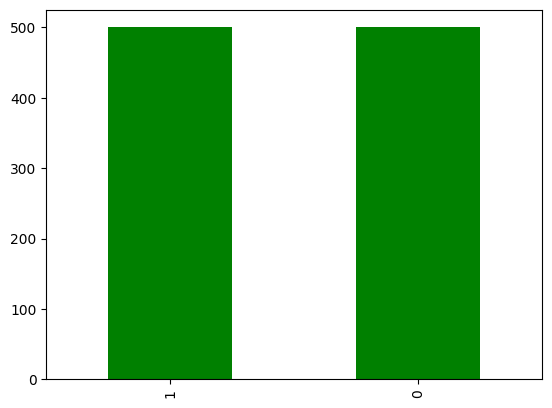

In [ ]:
data['Liked'].value_counts().plot.bar(color='green')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
import re
review=re.sub('[^a-zA-Z]',' ',data['Review'][0])

In [ ]:
review

'Wow    Loved this place '

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
for i in range(0,1000):
  review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
  #To convert ever word to smaller case
  review=review.lower()
  review_words=review.split()
  #Stemming each word
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

### Using MultionomialNB

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from nltk.metrics.scores import recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("-----Score-----")
print("Accuracy score is:{}%".format(round(score1*100,2)))
print("Precision score is:{}%".format(round(score2*100,2)))
print("Recall score is:{}%".format(round(score3*100,2)))

-----Score-----
Accuracy score is:76.5%
Precision score is:76.42%
Recall score is:78.64%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

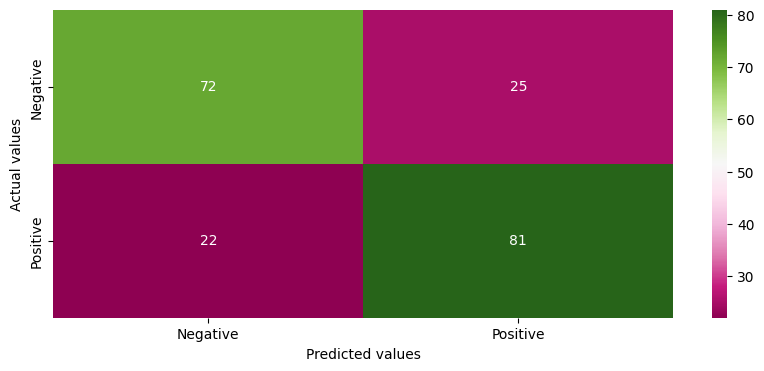

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True,cmap="PiYG",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

### Using Random Forest Classifier Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#For Train
y_pred=model.predict(x_test)
y_pred
acc=round(model.score(x_train,y_train)*100,2)
print(str(acc)+'%')

99.75%


In [ ]:
#For Test
y_pred=model.predict(x_test)
y_pred
acc=round(model.score(x_test,y_test)*100,2)
print(str(acc)+'%')

80.0%


### Using Naive Bayes - BernoulliNB

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
Bec= BernoulliNB(alpha=0.9)
Bec.fit(x_train, y_train)

BernoulliNB(alpha=0.9)

In [ ]:
y_pred_benb=Bec.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred_benb))
print(confusion_matrix(y_test, y_pred_benb))
print(classification_report(y_test, y_pred_benb))

0.77
[[73 24]
 [22 81]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        97
           1       0.77      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [ ]:
print(accuracy_score(y_test,y_pred_benb))

0.77


In [ ]:
def predict_sentiment(sample_review):
  sample_review=re.sub(pattern='a-zA-Z',repl=' ',string=sample_review)
  sample_review=sample_review.lower()
  sample_review_words=sample_review.split()
  sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review=[ps.stem(word) for word in sample_review_words]
  final_review=' '.join(final_review)

  temp=cv.transform([final_review]).toarray()
  return model.predict(temp)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
sample_review='The food is bad.'
if predict_sentiment(sample_review):
  print('This is a positive review')
else:
  print('This is a negative review')

This is a negative review


In [ ]:
sample_review='I loved the food! I will come here frequenlty eventually'
if predict_sentiment(sample_review):
  print('This is a positive review')
else:
  print('This is a negative review')

This is a positive review
